In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
#http://scikit-learn.org/stable/modules/ensemble.html

# Bagging

In [2]:
from csv import reader
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#Task is to train a network to discriminate between sonar signals bounced
#off a metal cylinder and those bounced off a roughly cylindrical rock.


filename = 'sonar.all-data.txt'
dataset=pd.read_csv(filename, header=None).values
lastColumn=len(dataset[0])-1

# convert class column to integers
dataset[:,lastColumn] = [0 if row[lastColumn]=='M' else 1 for row in dataset]

n_folds = 5
max_depth = 6

x = np.zeros((len(dataset),len(dataset[0])-1))
y = np.zeros(len(dataset))
for i in range(0, len(dataset)):
    x[i,:] = dataset[i][0:len(dataset[0])-1]
    y[i] = dataset[i][len(dataset[0])-1]

for n_est in [1, 5, 10, 50]:
    clf1 = BaggingClassifier(DecisionTreeClassifier(), n_estimators = n_est)
    scores = cross_val_score(clf1, x, y, cv=n_folds, scoring='accuracy')
    print('Trees: %d' % n_est)
    print('Scores: %s' % scores)
    print('Mean Accuracy: {:3f}%'.format(np.mean(scores)*100))
    
    clf2 = BaggingClassifier(KNeighborsClassifier(),n_estimators = n_est)
    scores = cross_val_score(clf2, x, y, cv=n_folds, scoring='accuracy')
    print('KNN: %d' % n_est)
    print('Scores: %s' % scores)
    print('Mean Accuracy: {:3f}%'.format(np.mean(scores)*100))

Trees: 1
Scores: [ 0.46511628  0.54761905  0.58536585  0.70731707  0.53658537]
Mean Accuracy: 56.840072%
KNN: 1
Scores: [ 0.62790698  0.5         0.51219512  0.63414634  0.34146341]
Mean Accuracy: 52.314237%
Trees: 5
Scores: [ 0.53488372  0.61904762  0.6097561   0.80487805  0.6097561 ]
Mean Accuracy: 63.566432%
KNN: 5
Scores: [ 0.62790698  0.69047619  0.56097561  0.58536585  0.26829268]
Mean Accuracy: 54.660346%
Trees: 10
Scores: [ 0.51162791  0.76190476  0.65853659  0.80487805  0.70731707]
Mean Accuracy: 68.885288%
KNN: 10
Scores: [ 0.58139535  0.64285714  0.53658537  0.6097561   0.31707317]
Mean Accuracy: 53.753343%
Trees: 50
Scores: [ 0.53488372  0.69047619  0.65853659  0.73170732  0.73170732]
Mean Accuracy: 66.946223%
KNN: 50
Scores: [ 0.60465116  0.61904762  0.56097561  0.56097561  0.26829268]
Mean Accuracy: 52.278854%


# Random Forests

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#generate 10000 data instances with 10 features spread around 100 centers.
X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()                             


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()                             

0.97940879382055857

0.99960784313725493

In [9]:
#Another full example
#https://raw.githubusercontent.com/saimadhu-polamuri/DataAspirant_codes/master/random_forest/scripts/random_forest.py
#http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Read data description at the UCI ML page for this dataset.
HEADERS = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
           "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "CancerType"]

# Load the csv file into pandas dataframe
dataset = pd.read_csv("breast-cancer-wisconsin.csv")
# Get basic statistics of the loaded dataset
#dataset.describe()

# Filter missing values
dataset=dataset[dataset[HEADERS[6]] != '?']
train_x, test_x, train_y, test_y = train_test_split(dataset[HEADERS[1:-1]], dataset[HEADERS[-1]],
                                                    train_size=0.7, test_size=0.3)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)
# Create random forest classifier instance
trained_model = RandomForestClassifier()
trained_model.fit(train_x, train_y)
predictions = trained_model.predict(test_x)

for i in range(0, 5):
    print("Actual outcome :: ",list(test_y)[i],"and Predicted outcome ::", predictions[i])

print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))
print(" Confusion matrix \n", confusion_matrix(test_y, predictions))

(477, 9) (477,) (205, 9) (205,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Actual outcome ::  2 and Predicted outcome :: 2
Actual outcome ::  2 and Predicted outcome :: 2
Actual outcome ::  4 and Predicted outcome :: 4
Actual outcome ::  2 and Predicted outcome :: 2
Actual outcome ::  2 and Predicted outcome :: 2
Train Accuracy ::  1.0
Test Accuracy  ::  0.975609756098
 Confusion matrix 
 [[130   1]
 [  4  70]]


# AdaBoost

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores
scores.mean()   

array([ 0.98039216,  0.94117647,  0.95833333])

0.95996732026143794

# Gradient Tree Boosting

In [11]:
#Classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X.shape
y.shape
y[0:10]
X_train, X_test = X[:10000], X[10000:]
y_train, y_test = y[:10000], y[10000:]

clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.9,
    max_depth=2, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

(12000, 10)

(12000,)

array([ 1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.])

0.96099999999999997

In [14]:
#Regression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]
est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
    max_depth=2, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))    

1.8274769560809017

In [15]:
#Fitting additional weak-learners
_ = est.set_params(n_estimators=600, warm_start=True)  # set warm_start and new nr of trees
_ = est.fit(X_train, y_train) # fit additional 100 trees to est
mean_squared_error(y_test, est.predict(X_test)) 

1.7966910536113181

# Feature Importance using Ensemble Classifiers

In [16]:
#feature importance
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X.shape
y.shape
X[0:5,:]
y[0:10]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
clf.feature_importances_  

(12000, 10)

(12000,)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028]])

array([ 1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.])

array([ 0.11,  0.1 ,  0.11,  0.1 ,  0.09,  0.11,  0.09,  0.1 ,  0.1 ,  0.09])

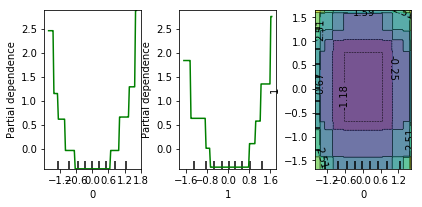

In [18]:
#Partial dependence
#Partial dependence plots (PDP) show the dependence between the target response and a set of ‘target’ features, 
#marginalizing over the values of all other features (the ‘complement’ features).

#read more about PDPs here: https://www.kaggle.com/dansbecker/partial-dependence-plots 
#and http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html

#One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear).
#PDPs with two target features show the interactions among the two features.
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
#show 1-way PDP for feature 0, 1-way PDP for feature 1, 2-way PDP for features 0 and 1 combined.
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features)

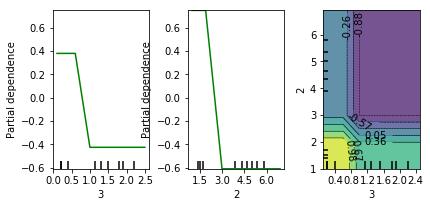

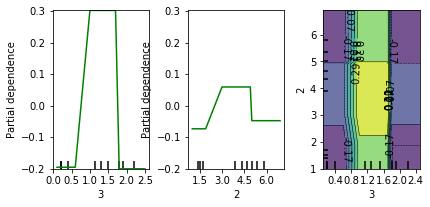

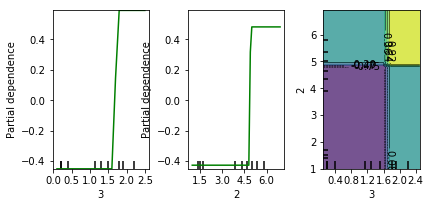

In [16]:
#For multi-class models, you need to set the class label for which the PDPs should be created via the label argument:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=0) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=1) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=2) 

In [17]:
#If you need the raw values of the partial dependence function rather than the plots you can use the partial_dependence function
from sklearn.ensemble.partial_dependence import partial_dependence
pdp, axes = partial_dependence(clf, [0], X=X)
pdp  
axes

array([[ 2.46643157,  2.46643157,  2.46643157,  2.46643157,  2.46643157,
         2.46643157,  1.15418258,  1.15418258,  1.15418258,  1.15418258,
         1.15418258,  0.61847569,  0.61847569,  0.61847569,  0.61847569,
         0.61847569,  0.61847569,  0.61847569,  0.61847569, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.4

[array([-1.62497054, -1.59201391, -1.55905727, -1.52610063, -1.49314399,
        -1.46018736, -1.42723072, -1.39427408, -1.36131744, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653425, -1.16357762,
        -1.13062098, -1.09766434, -1.0647077 , -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627142, -0.60331478, -0.57035814, -0.5374015 , -0.50444487,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966168,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783513, -0.17487849,
        -0.14192185, -0.10896521, -0.07600858, -0.04305194, -0.0100953 ,
         0.02286134,  0.05581797,  0.08877461,  0.12173125,  0.15468789,
         0.18764452,  0.22060116,  0.2535578 ,  0.28651444,  0.31947107,
         0.35242771,  0.38538435,  0.41834099,  0.45129762,  0.48425426,
         0.5172109 ,  0.55016754,  0.58312418,  0.6

# XGBoost 

In [46]:
#xgboost
from xgboost import XGBClassifier
#Look at this if there is a problem installing xgboost on your machine
#https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

#https://towardsdatascience.com/boosting-in-machine-learning-and-the-implementation-of-xgboost-in-python-fb5365e9f2a0
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
# split data into train and test sets 
X, Y = make_hastie_10_2(random_state=0)
seed=7 
test_size=0.33 
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size= test_size,random_state= seed)
# fit model no training data 
model = XGBClassifier() 
model.fit(X_train, y_train) 
print(model)
# make predictions for test data 
y_pred = model.predict(X_test) 
predictions=[round(value) for value in y_pred] 
# evaluate predictions 
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy",accuracy * 100.)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy 90.4292929293


# Parameter Tuning for GBMs

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.68718, std: 0.01286, params: {'n_estimators': 10},
  mean: 0.68759, std: 0.01605, params: {'n_estimators': 20},
  mean: 0.68687, std: 0.01916, params: {'n_estimators': 30},
  mean: 0.68496, std: 0.02226, params: {'n_estimators': 40},
  mean: 0.67968, std: 0.02373, params: {'n_estimators': 50},
  mean: 0.67225, std: 0.02137, params: {'n_estimators': 60},
  mean: 0.66790, std: 0.02128, params: {'n_estimators': 70},
  mean: 0.66506, std: 0.02233, params: {'n_estimators': 80},
  mean: 0.66277, std: 0.02407, params: {'n_estimators': 90},
  mean: 0.65978, std: 0.02408, params: {'n_estimators': 100}],
 {'n_estimators': 20},
 0.6875862533094478)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [5, 7, 9, 11, 13, 15], 'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.71033, std: 0.01541, params: {'max_depth': 5, 'min_samples_split': 10},
  mean: 0.71154, std: 0.01468, params: {'max_depth': 5, 'min_samples_split': 15},
  mean: 0.71253, std: 0.01188, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: 0.71027, std: 0.01542, params: {'max_depth': 5, 'min_samples_split': 25},
  mean: 0.71452, std: 0.01347, params: {'max_depth': 5, 'min_samples_split': 30},
  mean: 0.71162, std: 0.01689, params: {'max_depth': 5, 'min_samples_split': 35},
  mean: 0.71383, std: 0.01436, params: {'max_depth': 5, 'min_samples_split': 40},
  mean: 0.71349, std: 0.01345, params: {'max_depth': 5, 'min_samples_split': 45},
  mean: 0.69724, std: 0.01088, params: {'max_depth': 7, 'min_samples_split': 10},
  mean: 0.69327, std: 0.01876, params: {'max_depth': 7, 'min_samples_split': 15},
  mean: 0.69741, std: 0.01434, params: {'max_depth': 7, 'min_samples_split': 20},
  mean: 0.70133, std: 0.02107, params: {'max_depth': 7, 'min_samples_split': 25},
  mean: 0.69759,


Model Report
Accuracy : 0.8625
AUC Score (Train):  0.801639286923
CV Score : Mean -  0.71452516778  | Std -  0.0134718931176  | Min -  0.701739064808  | Max -  0.735954329333


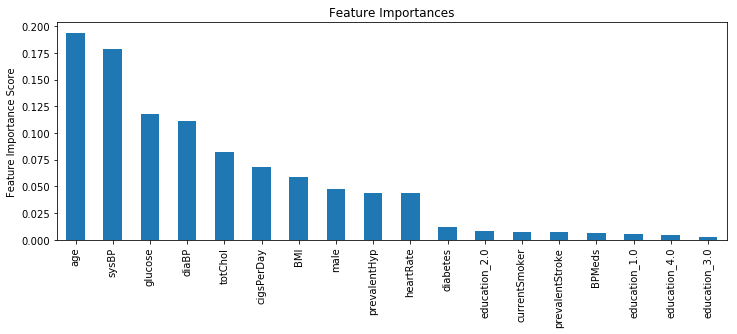

In [48]:
#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#Import libraries:
import pandas as pd
import random
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
random.seed(1234)

heart=pd.read_csv("framingham.csv",na_values=["?",","])
heart['education']=heart['education'].astype('category')
heart=pd.get_dummies(heart)
heart['TenYearCHD']=heart['TenYearCHD'].astype('category')
train=heart.fillna(heart.mean())
target=train['TenYearCHD']
train=train.drop(['TenYearCHD'], axis=1)

def modelfit(alg, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    train.shape
    target.shape
    alg.fit(train, target)
    #Predict training set:
    dtrain_predictions = alg.predict(train)
    dtrain_predprob = alg.predict_proba(train)[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, train, target, cv=cv_folds, scoring='roc_auc')
    #Print model report:
    print("\nModel Report")
    print("Accuracy :", metrics.accuracy_score(target, dtrain_predictions))
    print("AUC Score (Train): ", metrics.roc_auc_score(target, dtrain_predprob))
    if performCV:
        print('CV Score : Mean - ',np.mean(cv_score),' | Std - ',np.std(cv_score),' | Min - ',
              np.min(cv_score),' | Max - ',np.max(cv_score))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

#Fix learning rate and number of estimators for tuning tree-based parameters
param_test1 = {'n_estimators':list(range(10,110,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,
                                min_samples_leaf=5,max_depth=8,max_features='sqrt',random_state=10), 
                                param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(train,target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

#Tuning tree-specific parameters
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(10,50,5))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, 
                                        max_features='sqrt', random_state=10), 
                                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(train,target)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

modelfit(gsearch2.best_estimator_)

# Voting

In [19]:
#Majority Class Labels (Majority/Hard Voting)
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


# Weighted Average Probabilities (Soft Voting)

In [54]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data[:,[0,2]], iris.target,train_size=100, test_size=50)
train_x.shape
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(train_x,train_y)
clf2 = clf2.fit(train_x,train_y)
clf3 = clf3.fit(train_x,train_y)
eclf = eclf.fit(train_x,train_y)
clf1
clf2
clf3
eclf
eclf.predict(test_x)

(100, 2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

array([2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 2])

# VotingClassifier with GridSearch

In [20]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft',weights=[2,1,2])

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params,n_jobs=4, cv=5)
grid = grid.fit(iris.data, iris.target)
grid.grid_scores_
grid.best_estimator_
grid.best_params_
grid.best_score_

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95333, std: 0.02667, params: {'lr__C': 1.0, 'rf__n_estimators': 20},
 mean: 0.95333, std: 0.03399, params: {'lr__C': 1.0, 'rf__n_estimators': 200},
 mean: 0.96000, std: 0.02494, params: {'lr__C': 100.0, 'rf__n_estimators': 20},
 mean: 0.95333, std: 0.03399, params: {'lr__C': 100.0, 'rf__n_estimators': 200}]

VotingClassifier(estimators=[('lr', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFo...   oob_score=False, random_state=1, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

{'lr__C': 100.0, 'rf__n_estimators': 20}

0.95999999999999996